# data_description.ipynb
This notebook provides some basic information about the analysed population such as the number of patients who had HbA1c tests within the timeframe of interest (Jan 2019 to Jun 2021), breakdown by diabetes status, and distribution of HbA1c values.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from glob import glob

## Data Import

In [2]:
# Variables to import
import_vars = ['patient_id', 'took_hba1c', 'diabetes_type', 'hba1c_mmol_per_mol']

In [3]:
# Read in and append input files
li = []

for file in glob('../output/data/input_all*.csv'):
    df_temp = pd.read_csv(file)[import_vars]
    # Creates date variable based on file name
    df_temp['date'] = file[34:-4]
    df_temp['date'] = df_temp['date'].apply(lambda x: datetime.strptime(x.strip(), '%Y-%m-%d'))
    # Generates a count column
    df_temp['population'] = 1
    li.append(df_temp)
    
df_input = pd.concat(li, axis=0, ignore_index=False).reset_index(drop=True)

In [4]:
# Segment the data by diabetes status
df_t1dm = df_input.loc[df_input.diabetes_type == 'T1DM']
df_t2dm = df_input.loc[df_input.diabetes_type == 'T2DM']

In [5]:
# Subset by thresholds
def thresholds(limit):
    return df_t2dm.loc[df_t2dm.hba1c_mmol_per_mol > limit]

In [6]:
# Segment the data by threshold
df_gt48 = thresholds(48)
df_gt58 = thresholds(58)
df_gt64 = thresholds(64)
df_gt75 = thresholds(75)

## Distribution of HbA1c

In [7]:
# Display distribution
def show_hist(df_in, title):
    print(title)
    plt.hist(df_in.hba1c_mmol_per_mol, bins = 20)
    plt.show()

All Patients


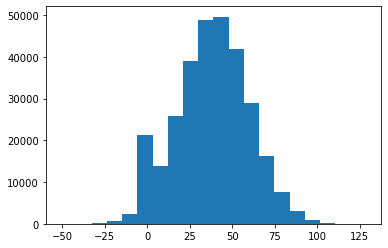

Patients with T2DM & HbA1c > 48


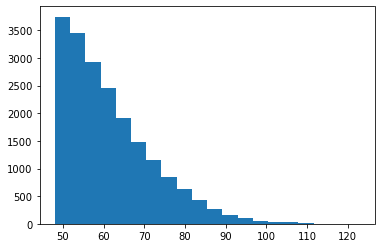

Patients with T2DM & HbA1c > 58


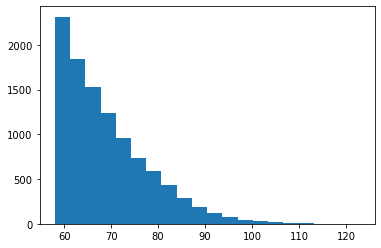

Patients with T2DM & HbA1c > 64


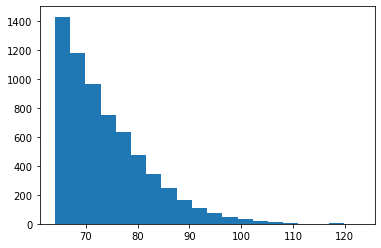

Patients with T2DM & HbA1c > 75


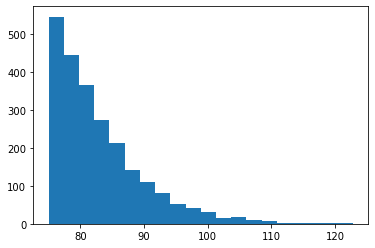

In [8]:
# Full distribution
show_hist(df_input, "All Patients")

# >48
show_hist(df_gt48, "Patients with T2DM & HbA1c > 48")

# >58
show_hist(df_gt58, "Patients with T2DM & HbA1c > 58")

# >64
show_hist(df_gt64, "Patients with T2DM & HbA1c > 64")

# >75
show_hist(df_gt75, "Patients with T2DM & HbA1c > 75")

## Descriptive Statistics

In [9]:
def unique_pat(df_in):
    return df_in.patient_id.nunique()

def unique_pat_tests(df_in):
    return df_in.loc[df_in.took_hba1c == 1].patient_id.nunique()

def invalid_tests(df_in):
    return len(df_in.loc[(df_in.took_hba1c == 1) &
        ((df_in.hba1c_mmol_per_mol == 0) | (df_in.hba1c_mmol_per_mol.isna()))])

In [10]:
# Population count between Jan 2019 and Jun 2021 by patient cohort

# Total number of patients 
pop_total = unique_pat(df_input)

# T1DM patients
pop_t1dm = unique_pat(df_t1dm)

# T2DM patients
pop_t2dm = unique_pat(df_t2dm)

print("Population Count")
print("Total: {}\nT1DM: {}\nT2DM: {}".format(pop_total, pop_t1dm, pop_t2dm))

Population Count
Total: 95813
T1DM: 8469
T2DM: 45337


In [11]:
# Number of patients who took HbA1c tests between Jan 2019 and Jun 2021 by patient cohort

# Total
pop_tests_total = unique_pat_tests(df_input)

# T1DM patients
pop_tests_t1dm = unique_pat_tests(df_t1dm)

# T2DM patients
pop_tests_t2dm = unique_pat_tests(df_t2dm)

print("Unique Patients with HbA1c Tests")
print("Total: {}\nT1DM: {}\nT2DM: {}".format(pop_tests_total, pop_tests_t1dm, pop_tests_t2dm))

Unique Patients with HbA1c Tests
Total: 25951
T1DM: 931
T2DM: 5711


In [12]:
# Segment T2DM patients who took HbA1c by thresholds 

# >48
pop_tests_gt48 = unique_pat_tests(df_gt48)

# >58 
pop_tests_gt58 = unique_pat_tests(df_gt58)

# >64
pop_tests_gt64 = unique_pat_tests(df_gt64)

# >75
pop_tests_gt75 = unique_pat_tests(df_gt75)

print("Unique Patients with HbA1c by Threshold")
print(
    "T2DM & HbA1c > 48: {}\nT2DM & HbA1c > 58: {}\nT2DM & HbA1c > 64: {}\nT2DM & HbA1c > 75: {}".format(
        pop_tests_gt48, pop_tests_gt58, pop_tests_gt64, pop_tests_gt75)
)

Unique Patients with HbA1c by Threshold
T2DM & HbA1c > 48: 1868
T2DM & HbA1c > 58: 996
T2DM & HbA1c > 64: 617
T2DM & HbA1c > 75: 234


In [13]:
# Check for any 0 or null values

# Total
invalid_total = invalid_tests(df_input)

# T1DM 
invalid_t1dm = invalid_tests(df_t1dm)

# T2DM 
invalid_t2dm = invalid_tests(df_t2dm)

print("0 or Null HbA1c Values")
print("Total: {}\nT1DM: {}\nT2DM: {}".format(invalid_total, invalid_t1dm, invalid_t2dm))

0 or Null HbA1c Values
Total: 1492
T1DM: 57
T2DM: 297
